# Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wine_df = pd.read_csv('../data/wine.csv')

display(wine_df.head())

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
missing_values = wine_df.isnull().sum()
invalid_values = wine_df.isna().sum()

print("Missing values:")
print(missing_values if missing_values.any() else "No missing values")

print("\nInvalid values:")
print(invalid_values if invalid_values.any() else "No invalid values")

Missing values:
No missing values

Invalid values:
No invalid values


array([<Axes: title={'center': 'count'}, xlabel='class'>], dtype=object)

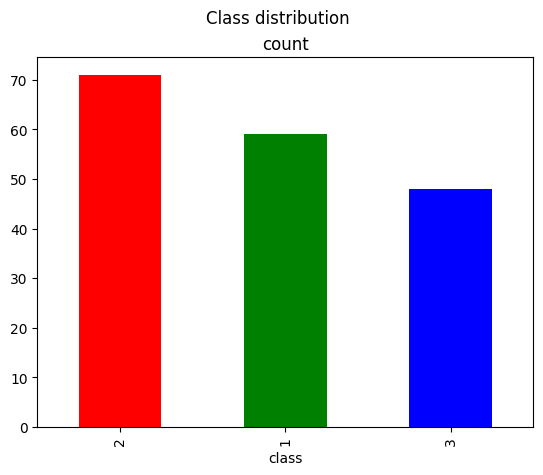

In [4]:
wine_df['class'].value_counts().plot.bar(color=['red', 'green', 'blue'], subplots=True, x='Class', y='Count', title='Class distribution')

In [5]:
most_variate_columns = pd.DataFrame(wine_df.var().sort_values(ascending=False).head(10), columns=['Variance'], index=None)
display(most_variate_columns)
most_variate_columns = most_variate_columns.index.tolist()
top_5_columns = most_variate_columns[:5]

,Variance
Proline,99166.717355
Magnesium,203.989335
Alcalinity_of_ash,11.152686
Color_intensity,5.374449
Malicacid,1.248015
Flavanoids,0.997719
Alcohol,0.659062
class,0.600679
0D280_0D315_of_diluted_wines,0.504086
Total_phenols,0.391690


# Pre Processing

In [6]:
X, y = wine_df.drop('class', axis=1), wine_df['class']
X_train, y_train, X_test, y_test = X[:int(len(X)*0.8)], y[:int(len(y)*0.8)], X[int(len(X)*0.2):], y[int(len(y)*0.2):]

In [7]:
std_train_df = (X_train - X_train.mean()) / X_train.std()
std_test_df = (X_test - X_test.mean()) / X_test.std()
norm_train_df = (X_train - X_train.min()) / (X_train.max() - X_train.min())
norm_test_df = (X_test - X_test.min()) / (X_test.max() - X_test.min())

### Normalization vs. Standardization

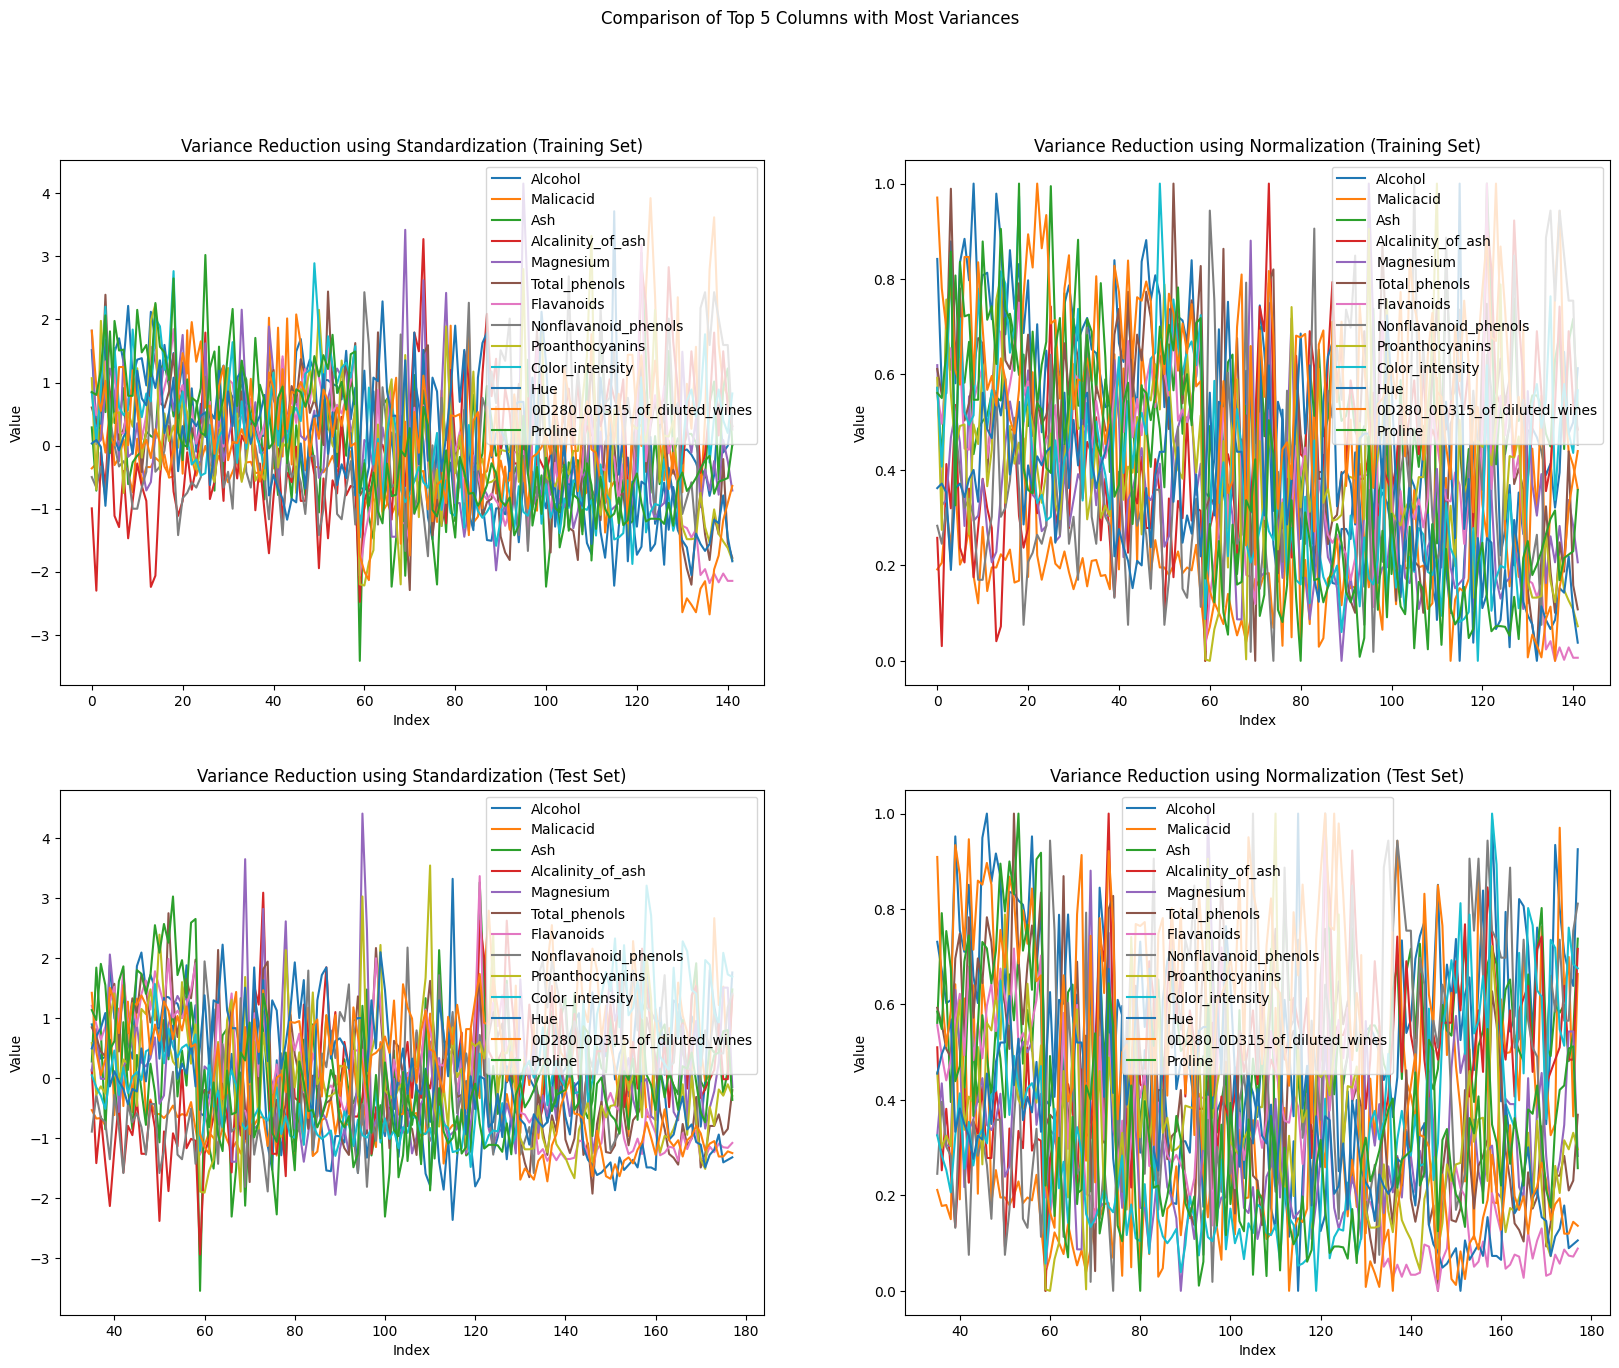

In [8]:
# Plot the columns in std_df and norm_df side by side
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

fig.suptitle('Comparison of Top 5 Columns with Most Variances')

std_train_df.plot.line(ax=axes[0, 0])
axes[0][0].set_title('Variance Reduction using Standardization (Training Set)')
axes[0][0].set_xlabel('Index')
axes[0][0].set_ylabel('Value')

norm_train_df.plot.line(ax=axes[0, 1])
axes[0][1].set_title('Variance Reduction using Normalization (Training Set)')
axes[0][1].set_xlabel('Index')
axes[0][1].set_ylabel('Value')

std_test_df.plot.line(ax=axes[1, 0])
axes[1][0].set_title('Variance Reduction using Standardization (Test Set)')
axes[1][0].set_xlabel('Index')
axes[1][0].set_ylabel('Value')

norm_test_df.plot.line(ax=axes[1, 1])
axes[1][1].set_title('Variance Reduction using Normalization (Test Set)')
axes[1][1].set_xlabel('Index')
axes[1][1].set_ylabel('Value')

plt.show()


In [9]:
def normalize(df):
    return (df - df.min()) / (df.max() - df.min())

In [10]:
# Train Normalization
X_train = normalize(X_train)
X_test = normalize(X_test)

In [20]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Function for one-hot encoding
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [16]:
num_classes = y.nunique()
print(f'Number of classes: {num_classes}')
y_train_one_hot = one_hot_encode(y_train_encoded, num_classes)
y_test_one_hot = one_hot_encode(y_test_encoded, num_classes)

Number of classes: 3


IndexError: index 3 is out of bounds for axis 1 with size 3

# Running the Neural Network

In [11]:
import sys

sys.path.append('../')
import mlp

In [12]:
clf = mlp.MLP(n_input=X.shape[1], n_hidden=[5,5], n_output=3, momentum=0.9)
clf.train(X=X_train, y=y_train, eta=0.1, epochs=1000)


Argument check
N input: 13 | N hidden: [5, 5] | N output: 3 | Momentum: 0.9

Weights check
Weight shape: (13, 5) | Bias shape: (1, 5)
Weight: [[-0.57490401 -0.37276491  0.21248424  0.64211888 -0.9303177 ]
 [-0.33225994  0.60936519 -0.00899318 -1.69872806  2.07499925]
 [-0.78462319 -0.23427429  1.19668467  0.20148786  1.08195366]
 [ 0.81806817 -0.16099713 -2.44125708  1.22149633  0.59354271]
 [ 0.68194821 -1.5648918  -0.00623094  1.83787876  1.70634962]
 [ 0.01075413 -0.24346511 -2.72928391 -0.64185996  0.01965334]
 [ 1.24728847 -0.30907582  0.52484844  0.39855047 -1.75298833]
 [-0.04713358 -0.011049   -0.96977326  0.65268071 -1.14138682]
 [-0.80269562  0.62458061 -0.78361897  1.22026958 -1.12746169]
 [ 0.68788551 -1.24555358 -0.0131727   1.94896097  1.50654207]
 [ 0.60610556  0.87808895  0.10499853 -0.49914207 -0.43463225]
 [ 1.29445609 -0.28032159  0.72299089 -1.79425905  1.16910963]
 [-0.73460356 -0.42786091  0.46763086  1.18160185  0.39295601]] | Bias: [[0. 0. 0. 0. 0.]]

Momentun 

ValueError: operands could not be broadcast together with shapes (142,) (142,3) 

In [12]:
momentum_values = [np.random.uniform(0, 1) for _ in range(10)]
learning_rate_values = [np.random.uniform(0, 1) for _ in range(10)]
hidden_layer_values = [np.random.randint(1, 10) for _ in range(10)]
epoch_values = [np.random.randint(100, 1000) for _ in range(10)]

In [13]:
def accuracy(y_pred, y_true):
    return np.sum(y_pred == y_true) / len(y_true)

In [14]:
def k_fold_train_test_split(X, y, k=5):
    accuracies = {}
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)

    for i in range(k):
        X_train = np.concatenate([X_folds[j] for j in range(k) if j != i])
        y_train = np.concatenate([y_folds[j] for j in range(k) if j != i])
        X_test, y_test = X_folds[i], y_folds[i]

        yield X_train, y_train, X_test, y_test

        clf = mlp.MLP(n_input=X.shape[1], n_hidden=5, n_output=3, momentum=0.9)
        clf.train(X=X_train, y=y_train, eta=0.1, epochs=1000)
        y_pred = clf.predict(X_test)

        accuracies[i] = accuracy(y_pred, y_test)
